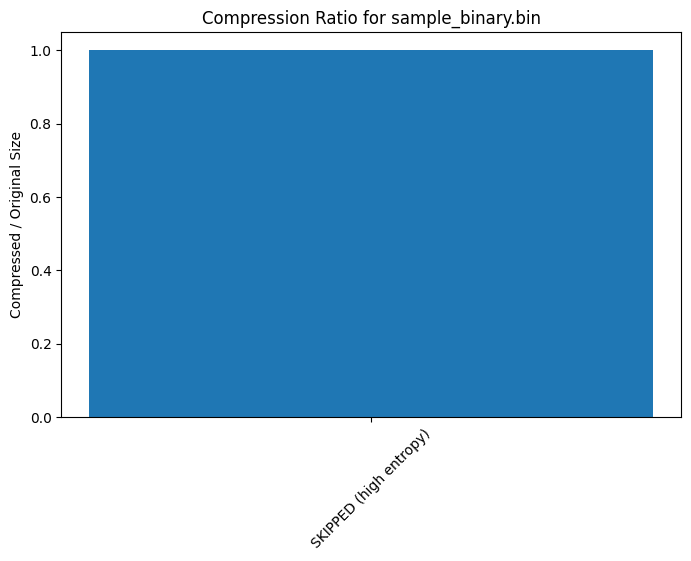

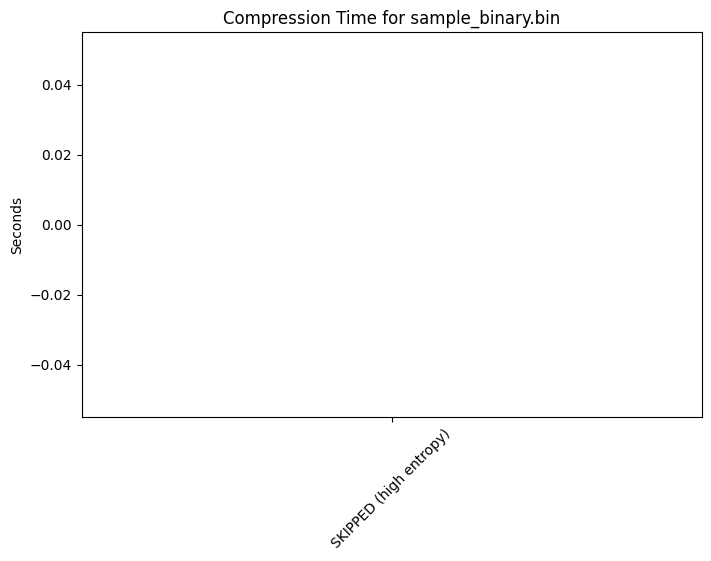

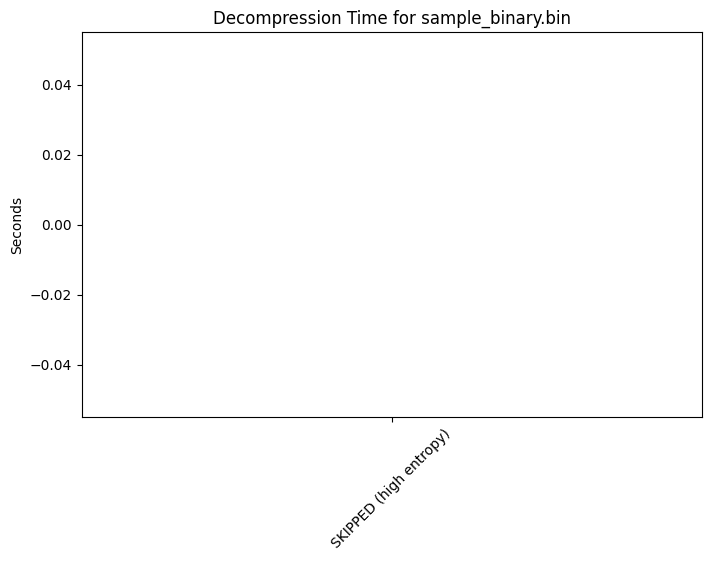

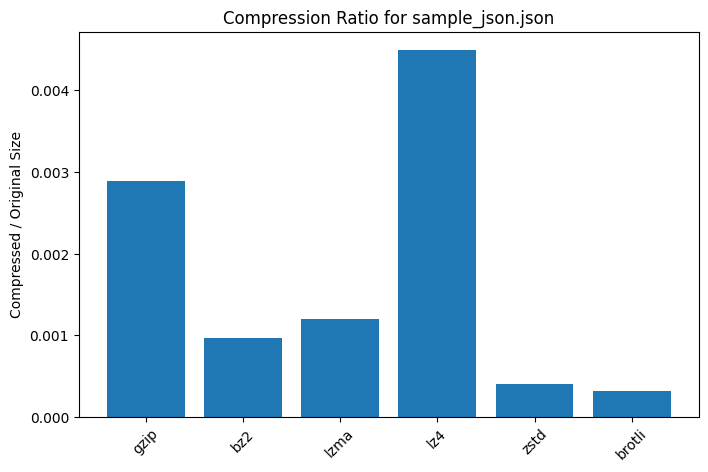

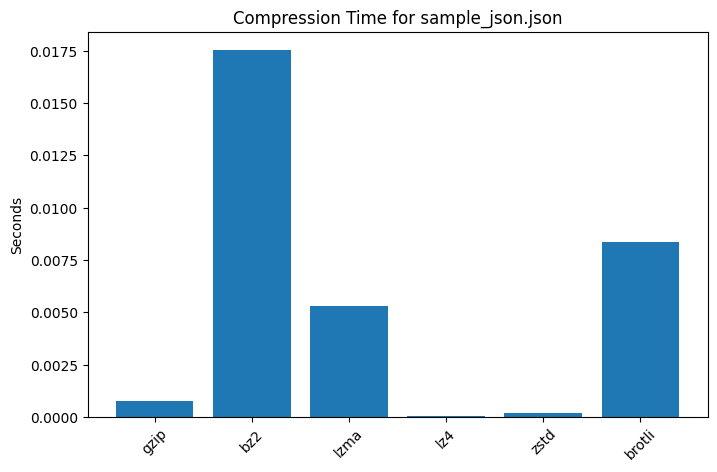

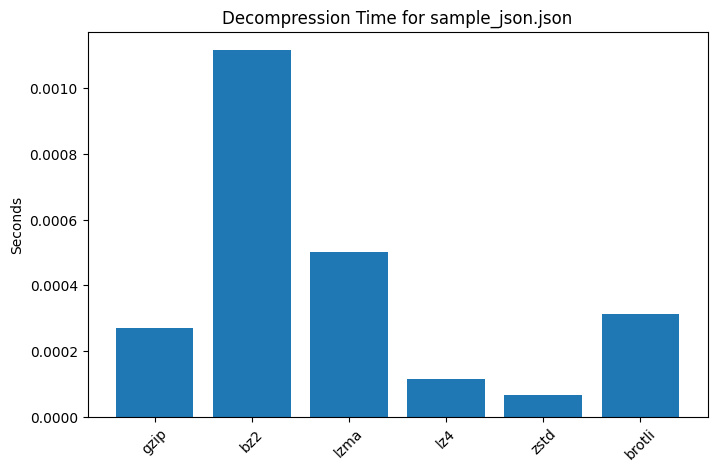

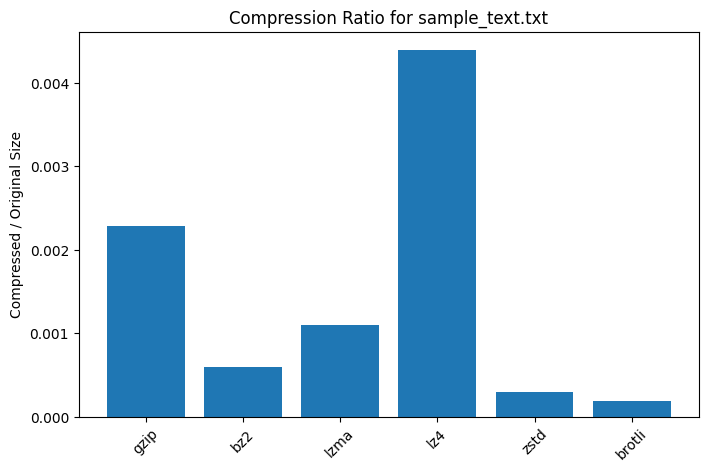

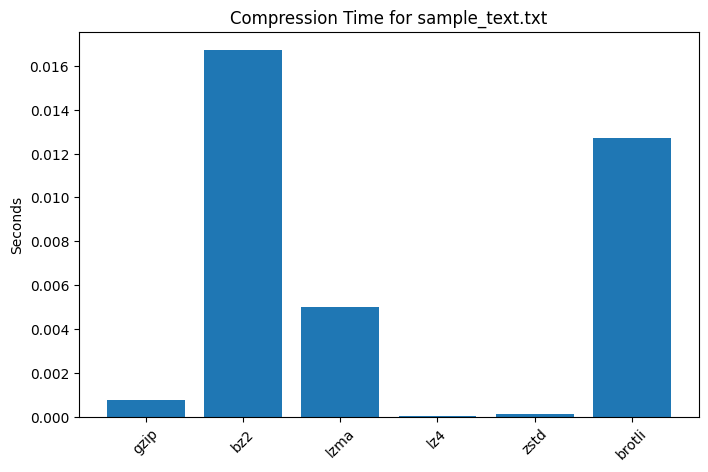

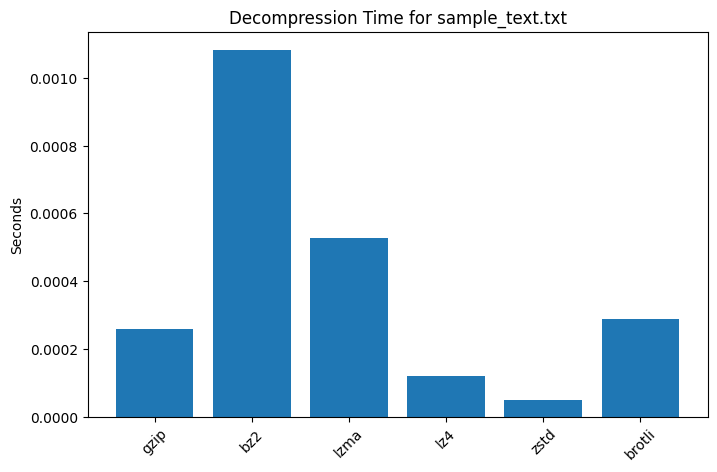

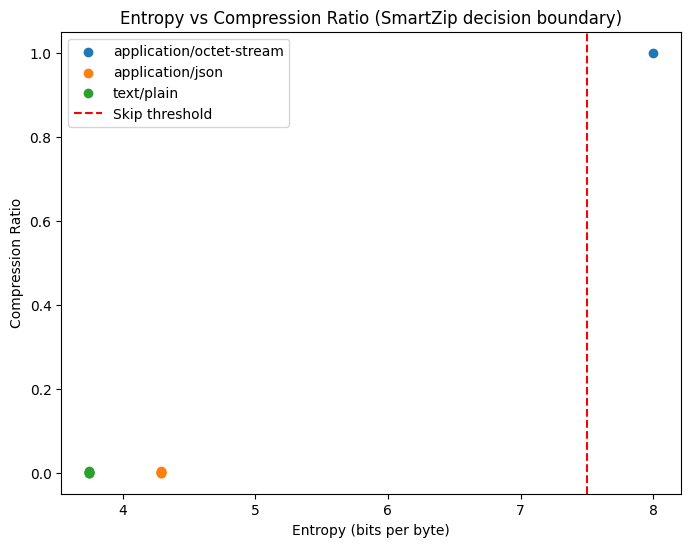

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def shannon_entropy(data: bytes) -> float:
    """Calculate Shannon entropy (0 = no randomness, 8 = max randomness)."""
    if not data:
        return 0
    freq = [0] * 256
    for b in data:
        freq[b] += 1
    entropy = 0
    for f in freq:
        if f > 0:
            p = f / len(data)
            entropy -= p * math.log2(p)
    return entropy

# Load results
df = pd.read_csv("results.csv")

# Keep only successful runs
df = df[df['correct'] == True]

df.groupby("type")[["compression_ratio","comp_time_sec"]].mean()

# Iterate over each test file
for file in df['file'].unique():
    subset = df[df['file'] == file]
    
    # --- Compression Ratio ---
    plt.figure(figsize=(8,5))
    plt.bar(subset['algorithm'], subset['compression_ratio'])
    plt.title(f"Compression Ratio for {file}")
    plt.ylabel("Compressed / Original Size")
    plt.xticks(rotation=45)
    plt.show()
    
    # --- Compression Time ---
    plt.figure(figsize=(8,5))
    plt.bar(subset['algorithm'], subset['comp_time_sec'])
    plt.title(f"Compression Time for {file}")
    plt.ylabel("Seconds")
    plt.xticks(rotation=45)
    plt.show()
    
    # --- Decompression Time ---
    plt.figure(figsize=(8,5))
    plt.bar(subset['algorithm'], subset['decomp_time_sec'])
    plt.title(f"Decompression Time for {file}")
    plt.ylabel("Seconds")
    plt.xticks(rotation=45)
    plt.show()

# Entropy vs Compression Ratio
plt.figure(figsize=(8,6))
for ftype in df['type'].unique():
    subset = df[df['type'] == ftype]
    plt.scatter(subset['entropy'], subset['compression_ratio'], label=ftype)

plt.axvline(7.5, color="red", linestyle="--", label="Skip threshold")
plt.xlabel("Entropy (bits per byte)")
plt.ylabel("Compression Ratio")
plt.title("Entropy vs Compression Ratio (SmartZip decision boundary)")
plt.legend()
plt.show()


